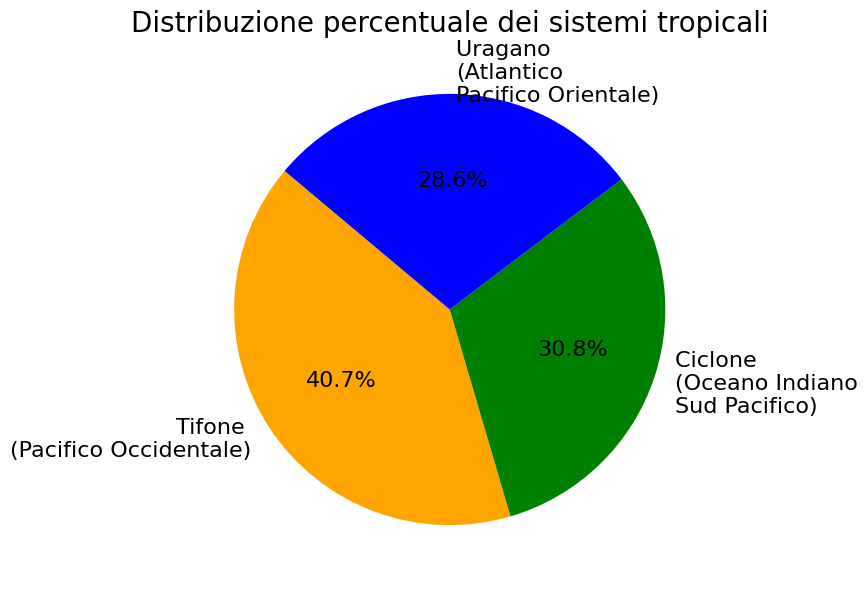

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("..//data//cicloni_2024.csv")

def tipo_e_zona(lat, lon):
    if lon > 180:
        lon -= 360
    if lat >= 0 and 100 <= lon <= 180:
        zona = 'Pacifico Occidentale'
        tipo = 'Tifone'
    elif (-100 <= lon <= -10) or (lat >= 0 and -130 <= lon <= -90):
        zona = 'Atlantico + Pacifico Orientale'
        tipo = 'Uragano'
    elif lat <= 0 and 40 <= lon <= 110:
        zona = 'Oceano Indiano + Sud Pacifico'
        tipo = 'Ciclone'
    else:
        zona = 'Oceano Indiano + Sud Pacifico'
        tipo = 'Ciclone' 
    return tipo, zona

df[['Tipo', 'Zona']] = df.apply(lambda row: pd.Series(tipo_e_zona(row['LAT'], row['LON'])), axis=1)
counts = df['Tipo'].value_counts()
zone_labels = {
    'Uragano': 'Atlantico\nPacifico Orientale',
    'Ciclone': 'Oceano Indiano\nSud Pacifico',
    'Tifone': 'Pacifico Occidentale',
    'Altro': ''
}
labels = [f"{tipo} \n({zone_labels[tipo]})" if zone_labels[tipo] else tipo for tipo in counts.index]
colors = {'Uragano': 'blue', 'Ciclone': 'green', 'Tifone': 'orange', 'Altro': 'gray'}
plt.figure(figsize=(7,7))
plt.pie(
    counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=[colors[i] for i in counts.index],
    textprops={'fontsize': 16} 
)
plt.title("Distribuzione percentuale dei sistemi tropicali", fontsize=20) 
plt.show()

plt.show()
